# Dispersion Coefficients Near Surfaces

In [1]:
%matplotlib inline

# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Operating system interfaces
import os, sys

# Parallel computing
if sys.platform != "win32": from multiprocessing import Pool

# pairinteraction :-)
if sys.platform == "darwin": sys.path.append("/Applications/pairinteraction.app/Contents/Resources")
elif sys.platform == "win32": sys.path.append("C:\Program Files\pairinteraction")
from libpairinteraction import pireal as pi

# Create cache for matrix elements
if not os.path.exists("./cache"):
    os.makedirs("./cache")
cache = pi.MatrixElementCache("./cache")

In [3]:
theta = np.pi/2 # rad
distance_atoms = 20 # µm
distance_surface = np.linspace(max(distance_atoms*0.3, distance_atoms/2*np.cos(theta)), 2*distance_atoms,50) # µm

In [4]:
state_one1 = pi.StateOne("Rb", 69, 0, 0.5, 0.5)
state_one2 = pi.StateOne("Rb", 72, 0, 0.5, 0.5)

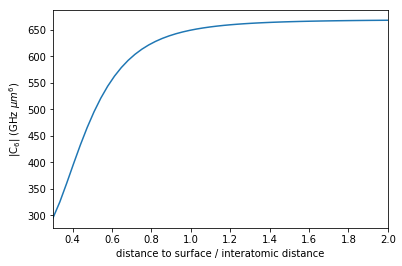

In [5]:
# Set up pair state
state_two = pi.StateTwo(state_one1, state_one2)

# Set up one-atom system
system_one = pi.SystemOne(state_one1.getSpecies(), cache)
system_one.restrictEnergy(min(state_one1.getEnergy(),state_one2.getEnergy()) - 30, \
                          max(state_one1.getEnergy(),state_one2.getEnergy()) + 30)
system_one.restrictN(min(state_one1.getN(),state_one2.getN()) - 3, \
                     max(state_one1.getN(),state_one2.getN()) + 3)
system_one.restrictL(min(state_one1.getL(),state_one2.getL()) - 1, \
                     max(state_one1.getL(),state_one2.getL()) + 1)
        
# Set up two-atom system
system_two = pi.SystemTwo(system_one, system_one, cache)
system_two.restrictEnergy(state_two.getEnergy() - 10, state_two.getEnergy() + 10)
system_two.setConservedParityUnderPermutation(pi.ODD)
system_two.setConservedParityUnderInversion(pi.ODD)

system_two.setAngle(theta)
system_two.setDistance(distance_atoms)
system_two.setSurfaceDistance(1)
system_two.enableGreenTensor(True)
system_two.buildInteraction()

# Calculate C6 coefficients
C6 = []
for d in distance_surface:
    system_two.setSurfaceDistance(d)
    system_two.diagonalize()
    energyshift = system_two.getHamiltonian().diagonal()[system_two.getBasisvectorIndex(state_two)]-state_two.getEnergy()
    C6.append(energyshift*distance_atoms**6)

# Plot results
plt.plot(distance_surface/distance_atoms, np.abs(C6))
plt.xlim(min(distance_surface/distance_atoms), max(distance_surface/distance_atoms))
plt.xlabel("distance to surface / interatomic distance")
plt.ylabel("|C$_6$| (GHz $\mu m^6$)");